<a href="https://colab.research.google.com/github/HunterBushnell/LUT_Neonate/blob/main/LUT_Neonate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install
!pip install neuron==8.2.2
!pip install bmtk==1.0.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Download Files

import os

if os.path.basename(os.getcwd())!='LUT_Neonate':
  !git clone https://github.com/HunterBushnell/LUT_Neonate
  %cd LUT_Neonate/
else:
  print('Mod files have already been downloaded.')
%ls

fatal: destination path 'LUT_Neonate' already exists and is not an empty directory.
/content/LUT_Neonate
biophys_components/  graphs/             PAG_spikes.csv    run_bionet.py
Blad_spikes.csv      images/             plot_results.py   run.sh
build_network.py     jsons/              plotting.pkl      spikes.csv
error_logs/          LUT_Baseline.ipynb  plotting.py       spikes_pag.csv
EUS_spikes.csv       network/            __pycache__/      synapses.py
feedback_loop.py     notes/              README.md
generate_input.py    output/             requirements.txt


In [3]:
# Compile Files

import os 
# move to the mechanisms folder
%cd biophys_components/mechanisms/
os.system("rm -rf x86_64") # deletes x86_64 if its there
%ls # just to make sure its gone
print(os.system('nrnivmodl modfiles')) # compile modfiles. Return 0 for success, 1 for failure.
%ls # check to make sure the folder is there now
%cd ../..
%ls

/content/LUT_Neonate/biophys_components/mechanisms
filess  modfiles/
0
filess  modfiles/  x86_64/
/content/LUT_Neonate
biophys_components/  graphs/             PAG_spikes.csv    run_bionet.py
Blad_spikes.csv      images/             plot_results.py   run.sh
build_network.py     jsons/              plotting.pkl      spikes.csv
error_logs/          LUT_Baseline.ipynb  plotting.py       spikes_pag.csv
EUS_spikes.csv       network/            __pycache__/      synapses.py
feedback_loop.py     notes/              README.md
generate_input.py    output/             requirements.txt


In [4]:
# Build Network

import numpy as np
from bmtk.builder.networks import NetworkBuilder
import math
import random

random.seed(42)
output_dir='network'

#######################################################################
##################### Create the cells ################################
#######################################################################
print("\nCreating Cells")

# Build the main network
net = NetworkBuilder('LUT')

# Specify number of cells in each population #

numBladaff  = 10
numPAGaff   = 10
#numEUSaff   = 10
numIND      = 10
numHypo     = 10
#numINmplus  = 10
#numINmminus = 10
numPGN      = 10
numFB       = 10
numIMG      = 10 
numMPG      = 10
#numEUSmn    = 10
#numBladmn   = 10
# Create the nodes ----------------------------------------
net.add_nodes(N=numBladaff, level='high',pop_name='Bladaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numPAGaff, pop_name='PAGaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
# net.add_nodes(N=numEUSaff, level='high',pop_name='EUSaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numIND, pop_name='IND',model_type='biophysical',model_template='hoc:IND',morphology='blank.swc')
net.add_nodes(N=numHypo, pop_name='Hypo',model_type='biophysical',model_template='hoc:HYPO',morphology='blank.swc')
# net.add_nodes(N=numINmplus, pop_name='INmplus',model_type='biophysical',model_template='hoc:INM',morphology='blank.swc')
# net.add_nodes(N=numINmminus, pop_name='INmminus',model_type='biophysical',model_template='hoc:INM',morphology='blank.swc')
net.add_nodes(N=numPGN, level='low', pop_name='PGN',model_type='biophysical',model_template='hoc:PGN',morphology='blank.swc') 
net.add_nodes(N=numFB, pop_name='FB',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numIMG, pop_name='IMG',model_type='biophysical',model_template='hoc:IMG',morphology='blank.swc')
net.add_nodes(N=numMPG, pop_name='MPG',model_type='biophysical',model_template='hoc:MPG',morphology='blank.swc') 
# net.add_nodes(N=numEUSmn, pop_name='EUSmn',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
# net.add_nodes(N=numBladmn, pop_name='Bladmn',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')

##################################################################################
####################### Connect the cells ########################################
##################################################################################
print("\nConnecting Cells")

# Connectivity function
# To use this function, the number of cells in the source population must be the same
# as the number of cells in the target population.
def one_to_one(source, target):
    sid = source.node_id
    tid = target.node_id
    source_name = source['pop_name']
    target_name = target['pop_name']
    # if source_name=='EUSaff':
    #     sid = sid-(numBladaff)
    if source_name=='PAGaff':
        sid = sid-(numBladaff)
    if source_name=='IND':
        sid = sid-(numBladaff+numPAGaff)
    if source_name=='Hypo':
        sid = sid-(numBladaff+numPAGaff+numIND)
    # if source_name=='INmplus':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if source_name=='INmminus':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if source_name=='PGN':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo)
    if source_name=='FB':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN)
    if source_name=='IMG':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB)
    if source_name=='MPG':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB+numIMG)
    # if source_name=='EUSmn':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if source_name=='Bladmn':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)
    
    # if target_name=='EUSaff':
        # tid = tid-(numBladaff)
    if target_name=='PAGaff':
        tid = tid-(numBladaff)
    if target_name=='IND':
        tid = tid-(numBladaff+numPAGaff)
    if target_name=='Hypo':
        tid = tid-(numBladaff+numPAGaff+numIND)
    # if target_name=='INmplus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if target_name=='INmminus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if target_name=='PGN':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo)
    if target_name=='FB':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN)
    if target_name=='IMG':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB)
    if target_name=='MPG':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB+numIMG)
    # if target_name=='EUSmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if target_name=='Bladmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)
    
    if sid == tid:
        print("connecting {} cell {} to {} cell {}".format(source_name,sid,target_name,tid))
        tmp_nsyn = 1
    else:
        return None

    return tmp_nsyn


def percent_connector(source,target,percent):
    """
    For connections where types don't have the same number of cells
    And positions are undefined for one type
    """
    sid = source.node_id
    tid = target.node_id
    source_name = source['pop_name']
    target_name = target['pop_name']

    # if source_name=='EUSaff':
    #     sid = sid-(numBladaff)
    if source_name=='PAGaff':
        sid = sid-(numBladaff)
    if source_name=='IND':
        sid = sid-(numBladaff+numPAGaff)
    if source_name=='Hypo':
        sid = sid-(numBladaff+numPAGaff+numIND)
    # if source_name=='INmplus':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if source_name=='INmminus':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if source_name=='PGN':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo)
    if source_name=='FB':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN)
    if source_name=='IMG':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB)
    if source_name=='MPG':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB+numIMG)
    # if source_name=='EUSmn':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if source_name=='Bladmn':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)
    
    # if target_name=='EUSaff':
        # tid = tid-(numBladaff)
    if target_name=='PAGaff':
        tid = tid-(numBladaff)
    if target_name=='IND':
        tid = tid-(numBladaff+numPAGaff)
    if target_name=='Hypo':
        tid = tid-(numBladaff+numPAGaff+numIND)
    # if target_name=='INmplus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if target_name=='INmminus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if target_name=='PGN':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo)
    if target_name=='FB':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN)
    if target_name=='IMG':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB)
    if target_name=='MPG':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB+numIMG)
    # if target_name=='EUSmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if target_name=='Bladmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    # if source_name=='EUSaff':
    #     sid = sid-(numBladaff)
    # if source_name=='PAGaff':
    #     sid = sid-(numBladaff+numEUSaff)
    # if source_name=='IND':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff)
    # if source_name=='Hypo':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND)
    # if source_name=='INmplus':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if source_name=='INmminus':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    # if source_name=='PGN':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    # if source_name=='FB':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    # if source_name=='IMG':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    # if source_name=='MPG':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    # if source_name=='EUSmn':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if source_name=='Bladmn':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)
    
    # if target_name=='EUSaff':
    #     tid = tid-(numBladaff)
    # if target_name=='PAGaff':
    #     tid = tid-(numBladaff+numEUSaff)
    # if target_name=='IND':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff)
    # if target_name=='Hypo':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND)
    # if target_name=='INmplus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if target_name=='INmminus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    # if target_name=='PGN':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    # if target_name=='FB':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    # if target_name=='IMG':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    # if target_name=='MPG':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    # if target_name=='EUSmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if target_name=='Bladmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    if random.random() < (float(percent)/100):
        print("connecting {} cell {} to {} cell {}".format(source_name,sid,target_name,tid))
        return 1
    else:
        return 0

def conn_props(source,target,mu,sigma):
    """
    Simply add connection properties as normal
    https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/NetworkBuilder_Intro.ipynb
    Can also adjust weights before running the network.
    See https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/02_single_cell_syn.ipynb
    Section 5
    If done this way the function will need to be imported in the run script, consider refactoring?
    """

    #syn_weight = np.random.lognormal(mean=mu,sigma=sigma)
    syn_weight = mu

    return syn_weight,0,0.5


# Add connections -----------------------------------------

# Blad afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='Bladaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0}, 
				   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')
				
conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':6.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

 # Blad afferent --> Hypogastric (Hou et al. 2014)
conn = net.add_edges(source=net.nodes(pop_name='Bladaff'), target=net.nodes(pop_name='Hypo'),
                    connection_rule=percent_connector,
                    connection_params={'percent':10.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='AMPA_ExcToExc.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':12.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

######## EUS afferent --> INd (Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='IND'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':1.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

# PAG afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':20.0e-3,'sigma':1},  # was 20.0e-3
                    dtypes=[np.float, np.int32, np.float])

# INd --> PGN (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='IND'), target=net.nodes(pop_name='PGN'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

 # Hypogastric --> IMG (Beckel et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='Hypo'), target=net.nodes(pop_name='IMG'),
                    connection_rule=percent_connector,
                    connection_params={'percent':10.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='AMPA_ExcToExc.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':12.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

## STSP synapse ##
# # EUS afferent --> INm+ (Grill et al. 2016) **Low pass filter**
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmplus'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='stsp.json', 
                   # model_template='Exp2Syn1_STSP')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':0.5,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

######## EUS afferent --> INm+(Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmplus'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':16.5e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])
# PAG afferent --> INm+ (Source?)
# Using this connection instead of synaptic depression for low pass filtering
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='PGN'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':11.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

######## EUS afferent --> INm-(Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmminus'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':16.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

######## INm+ --> PGN (Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='INmplus'), target=net.nodes(pop_name='PGN'),
#                    cconnection_rule=percent_connector,
#                    connection_params={'percent':10.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':1.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

######## INm- --> PGN (Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='INmminus'), target=net.nodes(pop_name='PGN'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':10.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='GABA_InhToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':20.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

# PGN --> MPG (Beckel et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='PGN'), target=net.nodes(pop_name='MPG'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# PGN --> FB (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='PGN'), target=net.nodes(pop_name='FB'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.0e-3,'sigma':1}, #was 12.0e-3
                    dtypes=[np.float, np.int32, np.float])

# FB --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='FB'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='GABA_InhToInh.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':20.0e-3,'sigma':1},       # was 12.0e-3
                    dtypes=[np.float, np.int32, np.float])

# # MPG --> Bladder MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='MPG'), target=net.nodes(pop_name='Bladmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':10.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':16.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# # IMG --> Bladder MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='IMG'), target=net.nodes(pop_name='Bladmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':10.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='GABA_InhToInh.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':10.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# PAG aff --> Hypogastric (de Groat, et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='Hypo'),
                    connection_rule=percent_connector,
                    connection_params={'percent':100.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='GABA_InhToInh.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':12.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

# PAG aff --> EUS MN (Shefchyk et al. 2001)
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='EUSmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='GABA_InhToInh.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':12.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# EUS afferent --> EUS MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='EUSmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':12.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# Connect virtual cells to EUS, Bladder, and PAG/PMC
Blad_aff_virt = NetworkBuilder('Blad_aff_virt') # Virtual cells delivering input to Bladder
# EUS_aff_virt = NetworkBuilder('EUS_aff_virt')   # Virtual cells delivering input to EUS
PAG_aff_virt = NetworkBuilder('PAG_aff_virt')   # Virtual cells delivering input to PAG/PMC

Blad_aff_virt.add_nodes(N=numBladaff, pop_name = 'Blad_aff_virt', model_type='virtual', potential='exc')
# EUS_aff_virt.add_nodes(N=numEUSaff, pop_name = 'EUS_aff_virt', model_type='virtual', potential='exc')
PAG_aff_virt.add_nodes(N=numPAGaff, pop_name = 'PAG_aff_virt', model_type='virtual', potential='exc')

Blad_aff_virt.add_edges(source=Blad_aff_virt.nodes(), target=net.nodes(pop_name='Bladaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=12.0e-03,
                   target_sections=['somatic'],
				   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

					
# EUS_aff_virt.add_edges(source=EUS_aff_virt.nodes(), target=net.nodes(pop_name='EUSaff'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    syn_weight=12.0e-03,
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

PAG_aff_virt.add_edges(source=PAG_aff_virt.nodes(), target=net.nodes(pop_name='PAGaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=20.0e-03,
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

####################################################################################
########################## Build and save network ##################################
####################################################################################

print("\nBuilding network and saving to directory \"" + output_dir + "\"")
net.build()
Blad_aff_virt.build()
# EUS_aff_virt.build()
PAG_aff_virt.build()

net.save_nodes(output_dir=output_dir)
net.save_edges(output_dir=output_dir)

Blad_aff_virt.save_nodes(output_dir=output_dir)
Blad_aff_virt.save_edges(output_dir=output_dir)

# EUS_aff_virt.save_nodes(output_dir=output_dir)
# EUS_aff_virt.save_edges(output_dir=output_dir)

PAG_aff_virt.save_nodes(output_dir=output_dir)
PAG_aff_virt.save_edges(output_dir=output_dir)

print("Done")


Creating Cells

Connecting Cells

Building network and saving to directory "network"
connecting Bladaff cell 0 to IND cell 0
connecting Bladaff cell 0 to IND cell 1
connecting Bladaff cell 0 to IND cell 2
connecting Bladaff cell 0 to IND cell 3
connecting Bladaff cell 0 to IND cell 4
connecting Bladaff cell 0 to IND cell 5
connecting Bladaff cell 0 to IND cell 6
connecting Bladaff cell 0 to IND cell 7
connecting Bladaff cell 0 to IND cell 8
connecting Bladaff cell 0 to IND cell 9
connecting Bladaff cell 1 to IND cell 0
connecting Bladaff cell 1 to IND cell 1
connecting Bladaff cell 1 to IND cell 2
connecting Bladaff cell 1 to IND cell 3
connecting Bladaff cell 1 to IND cell 4
connecting Bladaff cell 1 to IND cell 5
connecting Bladaff cell 1 to IND cell 6
connecting Bladaff cell 1 to IND cell 7
connecting Bladaff cell 1 to IND cell 8
connecting Bladaff cell 1 to IND cell 9
connecting Bladaff cell 2 to IND cell 0
connecting Bladaff cell 2 to IND cell 1
connecting Bladaff cell 2 to IND c

<ipython-input-4-9f08abc5c5a7>:268: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes=[np.float, np.int32, np.float])
<ipython-input-4-9f08abc5c5a7>:283: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes=[np.float, np.int32, np.float])
<ipython-input-4-9f08abc5c5a7>:313: DeprecationWarning: `np.float` is a deprecated alias for the b


connecting FB cell 2 to IND cell 5
connecting FB cell 2 to IND cell 6
connecting FB cell 2 to IND cell 7
connecting FB cell 2 to IND cell 8
connecting FB cell 2 to IND cell 9
connecting FB cell 3 to IND cell 0
connecting FB cell 3 to IND cell 1
connecting FB cell 3 to IND cell 2
connecting FB cell 3 to IND cell 3
connecting FB cell 3 to IND cell 4
connecting FB cell 3 to IND cell 5
connecting FB cell 3 to IND cell 6
connecting FB cell 3 to IND cell 7
connecting FB cell 3 to IND cell 8
connecting FB cell 3 to IND cell 9
connecting FB cell 4 to IND cell 0
connecting FB cell 4 to IND cell 1
connecting FB cell 4 to IND cell 2
connecting FB cell 4 to IND cell 3
connecting FB cell 4 to IND cell 4
connecting FB cell 4 to IND cell 5
connecting FB cell 4 to IND cell 6
connecting FB cell 4 to IND cell 7
connecting FB cell 4 to IND cell 8
connecting FB cell 4 to IND cell 9
connecting FB cell 5 to IND cell 0
connecting FB cell 5 to IND cell 1
connecting FB cell 5 to IND cell 2
connecting FB cell 

2023-05-11 03:29:29,824 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2023-05-11 03:29:29,969 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2023-05-11 03:29:30,017 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2023-05-11 03:29:30,150 [INFO] Building virtual cell stimulations for Blad_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for Blad_spikes


2023-05-11 03:29:30,202 [INFO] Building virtual cell stimulations for EUS_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for EUS_spikes


2023-05-11 03:29:30,256 [INFO] Building virtual cell stimulations for PAG_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for PAG_spikes


2023-05-11 03:29:30,315 [INFO] Running simulation for 50000.000 ms with the time step 0.200 ms


INFO:NEURONIOUtils:Running simulation for 50000.000 ms with the time step 0.200 ms


2023-05-11 03:29:30,319 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2023-05-11 03:29:30,323 [INFO] Block save every 50000 steps


INFO:NEURONIOUtils:Block save every 50000 steps


2023-05-11 03:29:54,356 [INFO]     step:50000 t_sim:10000.00 ms


INFO:NEURONIOUtils:    step:50000 t_sim:10000.00 ms


2023-05-11 03:29:54,424 [INFO] Timestep 0.0 to 10000.0 ms


INFO:NEURONIOUtils:Timestep 0.0 to 10000.0 ms


2023-05-11 03:29:54,443 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-05-11 03:29:54,450 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,452 [INFO] 70		19.0


INFO:NEURONIOUtils:70		19.0


2023-05-11 03:29:54,477 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,493 [INFO] 71		19.0


INFO:NEURONIOUtils:71		19.0


2023-05-11 03:29:54,501 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,533 [INFO] 72		19.0


INFO:NEURONIOUtils:72		19.0


2023-05-11 03:29:54,539 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,542 [INFO] 73		19.0


INFO:NEURONIOUtils:73		19.0


2023-05-11 03:29:54,548 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,550 [INFO] 74		19.0


INFO:NEURONIOUtils:74		19.0


2023-05-11 03:29:54,556 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,561 [INFO] 75		19.0


INFO:NEURONIOUtils:75		19.0


2023-05-11 03:29:54,563 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,570 [INFO] 76		19.0


INFO:NEURONIOUtils:76		19.0


2023-05-11 03:29:54,574 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,581 [INFO] 77		19.0


INFO:NEURONIOUtils:77		19.0


2023-05-11 03:29:54,586 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,589 [INFO] 78		19.0


INFO:NEURONIOUtils:78		19.0


2023-05-11 03:29:54,594 [INFO] PGN n_spikes: 19


INFO:NEURONIOUtils:PGN n_spikes: 19


2023-05-11 03:29:54,600 [INFO] 79		19.0


INFO:NEURONIOUtils:79		19.0


2023-05-11 03:29:54,605 [INFO] PGN firing rate avg: 19.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 19.0 Hz


2023-05-11 03:29:54,607 [INFO] Grill PGN fr = 5 Hz


INFO:NEURONIOUtils:Grill PGN fr = 5 Hz


2023-05-11 03:29:54,614 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-05-11 03:29:54,618 [INFO] IMG firing rate avg: 19.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 19.0 Hz


2023-05-11 03:29:54,643 [INFO] PGN firing rate = 19.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 19.00 Hz


2023-05-11 03:29:54,650 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-05-11 03:29:54,656 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-05-11 03:29:54,661 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-11 03:29:54,666 [INFO] t value: 


INFO:NEURONIOUtils:t value: 


2023-05-11 03:30:22,820 [INFO]     step:100000 t_sim:20000.00 ms


INFO:NEURONIOUtils:    step:100000 t_sim:20000.00 ms


2023-05-11 03:30:22,849 [INFO] Timestep 10000.0 to 20000.0 ms


INFO:NEURONIOUtils:Timestep 10000.0 to 20000.0 ms


2023-05-11 03:30:22,857 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-05-11 03:30:22,864 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,870 [INFO] 70		15.0


INFO:NEURONIOUtils:70		15.0


2023-05-11 03:30:22,873 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,875 [INFO] 71		15.0


INFO:NEURONIOUtils:71		15.0


2023-05-11 03:30:22,877 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,879 [INFO] 72		15.0


INFO:NEURONIOUtils:72		15.0


2023-05-11 03:30:22,884 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,886 [INFO] 73		15.0


INFO:NEURONIOUtils:73		15.0


2023-05-11 03:30:22,892 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,895 [INFO] 74		15.0


INFO:NEURONIOUtils:74		15.0


2023-05-11 03:30:22,897 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,899 [INFO] 75		15.0


INFO:NEURONIOUtils:75		15.0


2023-05-11 03:30:22,904 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,906 [INFO] 76		15.0


INFO:NEURONIOUtils:76		15.0


2023-05-11 03:30:22,908 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,910 [INFO] 77		15.0


INFO:NEURONIOUtils:77		15.0


2023-05-11 03:30:22,913 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,916 [INFO] 78		15.0


INFO:NEURONIOUtils:78		15.0


2023-05-11 03:30:22,918 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:30:22,920 [INFO] 79		15.0


INFO:NEURONIOUtils:79		15.0


2023-05-11 03:30:22,922 [INFO] PGN firing rate avg: 15.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 15.0 Hz


2023-05-11 03:30:22,924 [INFO] Grill PGN fr = 5 Hz


INFO:NEURONIOUtils:Grill PGN fr = 5 Hz


2023-05-11 03:30:22,927 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-05-11 03:30:22,929 [INFO] IMG firing rate avg: 15.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 15.0 Hz


2023-05-11 03:30:22,937 [INFO] PGN firing rate = 15.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 15.00 Hz


2023-05-11 03:30:22,940 [INFO] Volume = 2.0833 ml


INFO:NEURONIOUtils:Volume = 2.0833 ml


2023-05-11 03:30:22,942 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-05-11 03:30:22,944 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-11 03:30:22,947 [INFO] t value: 


INFO:NEURONIOUtils:t value: 


2023-05-11 03:30:44,967 [INFO]     step:150000 t_sim:30000.00 ms


INFO:NEURONIOUtils:    step:150000 t_sim:30000.00 ms


2023-05-11 03:30:44,989 [INFO] Timestep 20000.0 to 30000.0 ms


INFO:NEURONIOUtils:Timestep 20000.0 to 30000.0 ms


2023-05-11 03:30:44,993 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-05-11 03:30:44,998 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,005 [INFO] 70		23.0


INFO:NEURONIOUtils:70		23.0


2023-05-11 03:30:45,008 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,010 [INFO] 71		23.0


INFO:NEURONIOUtils:71		23.0


2023-05-11 03:30:45,017 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,019 [INFO] 72		23.0


INFO:NEURONIOUtils:72		23.0


2023-05-11 03:30:45,023 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,026 [INFO] 73		23.0


INFO:NEURONIOUtils:73		23.0


2023-05-11 03:30:45,028 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,032 [INFO] 74		23.0


INFO:NEURONIOUtils:74		23.0


2023-05-11 03:30:45,034 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,036 [INFO] 75		23.0


INFO:NEURONIOUtils:75		23.0


2023-05-11 03:30:45,040 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,042 [INFO] 76		23.0


INFO:NEURONIOUtils:76		23.0


2023-05-11 03:30:45,044 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,046 [INFO] 77		23.0


INFO:NEURONIOUtils:77		23.0


2023-05-11 03:30:45,051 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,053 [INFO] 78		23.0


INFO:NEURONIOUtils:78		23.0


2023-05-11 03:30:45,055 [INFO] PGN n_spikes: 23


INFO:NEURONIOUtils:PGN n_spikes: 23


2023-05-11 03:30:45,057 [INFO] 79		23.0


INFO:NEURONIOUtils:79		23.0


2023-05-11 03:30:45,059 [INFO] PGN firing rate avg: 23.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 23.0 Hz


2023-05-11 03:30:45,061 [INFO] Grill PGN fr = 5 Hz


INFO:NEURONIOUtils:Grill PGN fr = 5 Hz


2023-05-11 03:30:45,063 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-05-11 03:30:45,066 [INFO] IMG firing rate avg: 23.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 23.0 Hz


2023-05-11 03:30:45,074 [INFO] PGN firing rate = 23.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 23.00 Hz


2023-05-11 03:30:45,077 [INFO] Volume = 4.1667 ml


INFO:NEURONIOUtils:Volume = 4.1667 ml


2023-05-11 03:30:45,080 [INFO] Pressure = 5.00 mmHg


INFO:NEURONIOUtils:Pressure = 5.00 mmHg


2023-05-11 03:30:45,082 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-11 03:30:45,084 [INFO] t value: 


INFO:NEURONIOUtils:t value: 


2023-05-11 03:31:07,916 [INFO]     step:200000 t_sim:40000.00 ms


INFO:NEURONIOUtils:    step:200000 t_sim:40000.00 ms


2023-05-11 03:31:07,934 [INFO] Timestep 30000.0 to 40000.0 ms


INFO:NEURONIOUtils:Timestep 30000.0 to 40000.0 ms


2023-05-11 03:31:07,938 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-05-11 03:31:07,942 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,946 [INFO] 70		15.0


INFO:NEURONIOUtils:70		15.0


2023-05-11 03:31:07,948 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,950 [INFO] 71		15.0


INFO:NEURONIOUtils:71		15.0


2023-05-11 03:31:07,952 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,954 [INFO] 72		15.0


INFO:NEURONIOUtils:72		15.0


2023-05-11 03:31:07,956 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,958 [INFO] 73		15.0


INFO:NEURONIOUtils:73		15.0


2023-05-11 03:31:07,960 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,962 [INFO] 74		15.0


INFO:NEURONIOUtils:74		15.0


2023-05-11 03:31:07,965 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,967 [INFO] 75		15.0


INFO:NEURONIOUtils:75		15.0


2023-05-11 03:31:07,969 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,971 [INFO] 76		15.0


INFO:NEURONIOUtils:76		15.0


2023-05-11 03:31:07,976 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,979 [INFO] 77		15.0


INFO:NEURONIOUtils:77		15.0


2023-05-11 03:31:07,983 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,985 [INFO] 78		15.0


INFO:NEURONIOUtils:78		15.0


2023-05-11 03:31:07,988 [INFO] PGN n_spikes: 15


INFO:NEURONIOUtils:PGN n_spikes: 15


2023-05-11 03:31:07,993 [INFO] 79		15.0


INFO:NEURONIOUtils:79		15.0


2023-05-11 03:31:07,995 [INFO] PGN firing rate avg: 15.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 15.0 Hz


2023-05-11 03:31:07,997 [INFO] Grill PGN fr = 5 Hz


INFO:NEURONIOUtils:Grill PGN fr = 5 Hz


2023-05-11 03:31:08,000 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-05-11 03:31:08,002 [INFO] IMG firing rate avg: 15.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 15.0 Hz


2023-05-11 03:31:08,010 [INFO] PGN firing rate = 15.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 15.00 Hz


2023-05-11 03:31:08,020 [INFO] Volume = 6.2500 ml


INFO:NEURONIOUtils:Volume = 6.2500 ml


2023-05-11 03:31:08,022 [INFO] Pressure = 5.00 mmHg


INFO:NEURONIOUtils:Pressure = 5.00 mmHg


2023-05-11 03:31:08,024 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-11 03:31:08,026 [INFO] t value: 


INFO:NEURONIOUtils:t value: 


2023-05-11 03:31:30,846 [INFO]     step:250000 t_sim:50000.00 ms


INFO:NEURONIOUtils:    step:250000 t_sim:50000.00 ms


2023-05-11 03:31:30,870 [INFO] Timestep 40000.0 to 50000.0 ms


INFO:NEURONIOUtils:Timestep 40000.0 to 50000.0 ms


2023-05-11 03:31:30,874 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-05-11 03:31:30,878 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,881 [INFO] 70		18.0


INFO:NEURONIOUtils:70		18.0


2023-05-11 03:31:30,883 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,886 [INFO] 71		18.0


INFO:NEURONIOUtils:71		18.0


2023-05-11 03:31:30,888 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,890 [INFO] 72		18.0


INFO:NEURONIOUtils:72		18.0


2023-05-11 03:31:30,892 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,894 [INFO] 73		18.0


INFO:NEURONIOUtils:73		18.0


2023-05-11 03:31:30,896 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,898 [INFO] 74		18.0


INFO:NEURONIOUtils:74		18.0


2023-05-11 03:31:30,900 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,905 [INFO] 75		18.0


INFO:NEURONIOUtils:75		18.0


2023-05-11 03:31:30,907 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,909 [INFO] 76		18.0


INFO:NEURONIOUtils:76		18.0


2023-05-11 03:31:30,914 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,916 [INFO] 77		18.0


INFO:NEURONIOUtils:77		18.0


2023-05-11 03:31:30,917 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,919 [INFO] 78		18.0


INFO:NEURONIOUtils:78		18.0


2023-05-11 03:31:30,921 [INFO] PGN n_spikes: 18


INFO:NEURONIOUtils:PGN n_spikes: 18


2023-05-11 03:31:30,923 [INFO] 79		18.0


INFO:NEURONIOUtils:79		18.0


2023-05-11 03:31:30,928 [INFO] PGN firing rate avg: 18.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 18.0 Hz


2023-05-11 03:31:30,930 [INFO] Grill PGN fr = 5 Hz


INFO:NEURONIOUtils:Grill PGN fr = 5 Hz


2023-05-11 03:31:30,932 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-05-11 03:31:30,934 [INFO] IMG firing rate avg: 18.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 18.0 Hz


2023-05-11 03:31:30,944 [INFO] PGN firing rate = 18.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 18.00 Hz


2023-05-11 03:31:30,950 [INFO] Volume = 8.3333 ml


INFO:NEURONIOUtils:Volume = 8.3333 ml


2023-05-11 03:31:30,953 [INFO] Pressure = 5.00 mmHg


INFO:NEURONIOUtils:Pressure = 5.00 mmHg


2023-05-11 03:31:30,955 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-11 03:31:30,957 [INFO] t value: 


INFO:NEURONIOUtils:t value: 


2023-05-11 03:31:31,069 [INFO] Simulation completed in 2.0 minutes, 0.7545 seconds 


INFO:NEURONIOUtils:Simulation completed in 2.0 minutes, 0.7545 seconds 


250000 0.2
[ 0 25 26 27 23 24 29 30 31 33 34 35 36 40 37 28 22  2  3  4  5  6  7  8
  9 10 11 12 13 14  1 79 78 15 21 20 16 17 18 19 41 51 52 53 49 50 55 56
 57 54 43 44 45 42 47 48 46 74 75 73 77 76 59 60 65 66 69 70 58 71 72]


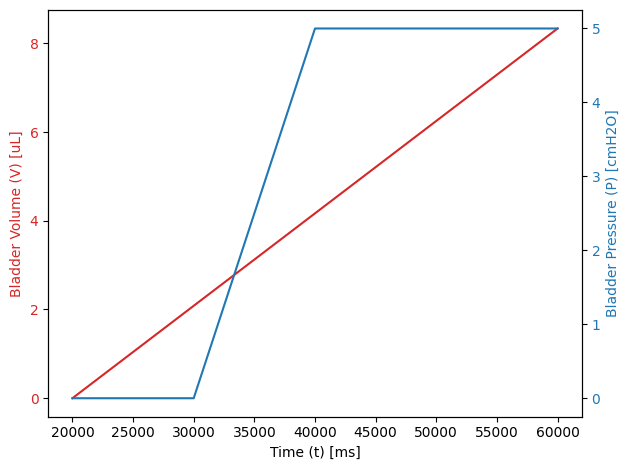

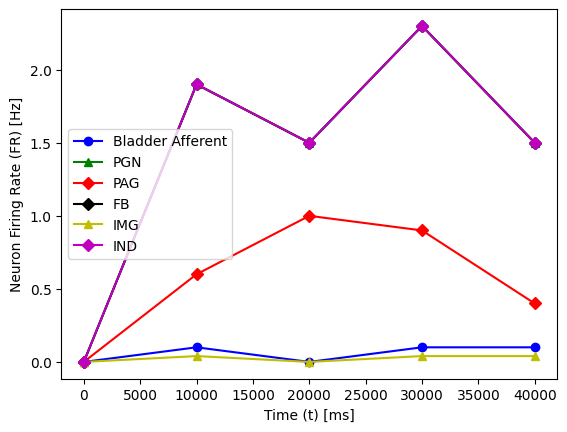

In [5]:
import os, sys, logging, faulthandler
from bmtk.simulator import bionet
from bmtk.simulator.bionet.default_setters.cell_models import loadHOC
from bmtk.simulator.bionet.modules.sim_module import SimulatorMod
from bmtk.utils.reports.spike_trains import SpikeTrains
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
from bmtk.simulator.bionet.io_tools import io
import numpy as np
from neuron import h
import pandas as pd
# from bmtk.analyzer.cell_vars import plot_report
from feedback_loop import FeedbackLoop
from plotting import plot_figure, plotting_calculator
# Import the synaptic depression/facilitation model
import synapses

import plot_results


"""
Basic Logging features, disable faulthandler if you don't want stacktraces printed
logging determines the level and file to save logs to (might be worth moving location)
"""
faulthandler.enable()
logging.basicConfig(filename='error_logs/debug_run.log', level=logging.DEBUG)

synapses.load()
logging.info('Synapses Loaded')

press_thres = 17 #17 # cm H20 #40
                 # Lingala, et al. 2016
change_thres = 10 #10 # cm H20 #10
                 # Need biological value for this

bionet.pyfunction_cache.add_cell_model(loadHOC, directive='hoc', model_type='biophysical')
logging.info('Cell model added')

def run(config_file):

    conf = bionet.Config.from_json(config_file, validate=True)
    conf.build_env()

    fbmod = FeedbackLoop()

    graph = bionet.BioNetwork.from_config(conf)
    sim = bionet.BioSimulator.from_config(conf, network=graph)
    sim.add_mod(fbmod)  # Attach the above module to the simulator.
    sim.run()

    #fbmod.save_aff(conf.output_dir)
    plot_results.run(sim=sim,conf=conf)

# if __name__ == '__main__':
#     if __file__ != sys.argv[-1]:
#         run(sys.argv[-1])
#     else:
#         run('config.json')

run(config_file='jsons/simulation_config.json')